# Предварительный анализ данных

Для начала импортируем все необходимые библиотеки для предварительного анализа данных (для работы с таблицами, векторами и матрицами, для построения графиков и корреляционных матриц)

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)
from matplotlib import pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Откроем датасет (в кавычках указан путь к файлу на моем копмьютере, нужно его заменить), указанные параметры - параметры открытия файла csv. Если русские символы декодируются неправильно или что-то ломается - следует убрать " engine='python' ". Далее открываем датасет

In [2]:
df = pd.read_csv("C:/Users/Даша/Anaconda3/PROJECT_EKM/dataset.csv", engine='python', sep=";", decimal=',')
df

,№,Наименование,Год,"Возраст компании, лет",Статус,Организационно-правовая форма,Форма собственности,"Оборотные активы, RUB","Активы всего, RUB","Нераспределенная прибыль (непокрытый убыток), RUB","Долгосрочные обязательства, RUB","Краткосрочные обязательства, RUB","Совокупный долг, RUB","Выручка, RUB","Коэффициент оборачиваемости совокупных активов, %",Оборотные активы на единицу активов,Активы всего на единицу активов,Нераспределенная прибыль (непокрытый убыток) на единицу активов,Долгосрочные обязательства на единицу активов,Краткосрочные обязательства на единицу активов,Совокупный долг на единицу активов,Выручка на единицу активов,Гос собственность,Частичная,Частная,АО,Гос собственность.1,Сельское хозво,Неком,Кооперативы,ООО
0,1,"АМУРТОРГ28, ООО",20.0,3.5,1.0,5.0,0.0,130578000.0,1.526150e+08,-30953000.0,17612000.0,1.649560e+08,1.825680e+08,334000.0,0.00,0.86,1.0,-0.20,0.12,1.08,1.20,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,"ДЖАЛЫКОВО, АО",20.0,21.5,1.0,0.0,0.0,16382000.0,4.081700e+07,2790000.0,13920000.0,5.173000e+06,1.909300e+07,8053000.0,0.20,0.40,1.0,0.07,0.34,0.13,0.47,0.20,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,"ДЮРТЮЛИНСКИЙ КОМБИНАТ МОЛОЧНЫХ ПРОДУКТОВ, АО",20.0,24.5,1.0,0.0,0.0,634318000.0,9.941510e+08,-104884000.0,164467000.0,7.084700e+08,8.729370e+08,240000.0,0.00,0.64,1.0,-0.11,0.17,0.71,0.88,0.00,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,"ЛУЖСКИЙ ККЗ, АО",20.0,27.0,1.0,0.0,0.0,464638000.0,1.779447e+09,-849560000.0,16021000.0,1.540324e+09,1.556345e+09,888234000.0,0.46,0.26,1.0,-0.48,0.01,0.87,0.87,0.50,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,"МАЯК, ООО",20.0,17.0,1.0,5.0,0.0,1243000.0,1.639880e+08,-85584000.0,137409000.0,1.055910e+08,2.430000e+08,23137000.0,0.11,0.01,1.0,-0.52,0.84,0.64,1.48,0.14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,3 503,"ЯРКОВСКОЕ, АО СХП",19.0,28.0,0.0,0.0,0.0,168457000.0,4.546560e+08,342323000.0,13318000.0,9.886300e+07,1.121810e+08,150780000.0,0.34,0.37,1.0,0.75,0.03,0.22,0.25,0.33,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3426,3 504,"ЯРОВИТ, ООО",19.0,8.5,0.0,5.0,0.0,128667000.0,3.050880e+08,144677000.0,9801000.0,1.807400e+07,2.787500e+07,117500000.0,0.28,0.42,1.0,0.47,0.03,0.06,0.09,0.39,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3427,3 505,"ЯРТЕХСЕРВИС, ООО",19.0,14.0,0.0,5.0,0.0,44081000.0,5.294400e+07,46840000.0,62000.0,6.032000e+06,6.094000e+06,94691000.0,1.82,0.83,1.0,0.88,0.00,0.11,0.12,1.79,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3428,3 506,"ЯСТРО-ЛАКТ, ООО",19.0,1.0,0.0,5.0,0.0,75153000.0,2.662330e+08,3655000.0,NaN,2.625680e+08,2.625680e+08,23028000.0,0.17,0.28,1.0,0.01,0.00,0.99,0.99,0.09,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Смотрим на данные. Типы числовых данных должны быть типами "int64" или "float64"

In [3]:
for i in df.columns:
    print(df[i].dtype, ':', i)

object : №
object : Наименование
float64 : Год
float64 : Возраст компании, лет
float64 : Статус
float64 : Организационно-правовая форма
float64 : Форма собственности
float64 : Оборотные активы, RUB
float64 : Активы  всего, RUB
float64 : Нераспределенная прибыль (непокрытый убыток), RUB
float64 : Долгосрочные обязательства, RUB
float64 : Краткосрочные обязательства, RUB
float64 : Совокупный долг, RUB
float64 : Выручка, RUB
float64 : Коэффициент оборачиваемости совокупных активов, %
float64 : Оборотные активы на единицу активов
float64 : Активы  всего на единицу активов
float64 : Нераспределенная прибыль (непокрытый убыток) на единицу активов
float64 : Долгосрочные обязательства на единицу активов
float64 : Краткосрочные обязательства на единицу активов
float64 : Совокупный долг на единицу активов
float64 : Выручка на единицу активов
float64 : Гос собственность
float64 : Частичная
float64 : Частная
float64 : АО
float64 : Гос собственность.1
float64 : Сельское хозво
float64 : Неком
float6

Далее убираем все пустые значения, создаем отдельный столбец данных Y = "статус" и убираем статус из датасета

In [4]:
df = df.dropna()

In [5]:
data = df.copy()
Y = data['Статус']
data = data.drop(['Статус'], axis=1)

Создаем датасет data_num только с числовыми данными. Также уберем из датасета категориальные переменные:

'Организационно-правовая форма', 'Форма собственности'

In [7]:
data_num = data.copy()
data_num = data_num.drop(['№','Наименование', 'Организационно-правовая форма', 'Форма собственности'], axis = 1)

Создаем корреляционную матрицу числовых переменных с переменной "статус", а также корреляционную матрицу числовых переменных между собой. Далее создадим список названий столбцов (переменных), чтобы с ними было удобно работать

После этого создадим датафрейм, где indicator - название переменной, value - коэфф корреляции с переменной "Статус"

In [8]:
corr_matr = data_num.corrwith(Y)

In [9]:
corr_matr = corr_matr.to_dict()

In [10]:
tab = {'indicator': list(corr_matr.keys()) , 'value': list(corr_matr.values())}
tabl = pd.DataFrame(tab, columns = ['indicator','value'])

In [11]:
tabl = tabl.sort_values(by=['value'])
tabl

,indicator,value
0,Год,-0.347236
9,"Коэффициент оборачиваемости совокупных активов, %",-0.072563
19,Частная,-0.063123
22,Сельское хозво,-0.059228
16,Выручка на единицу активов,-0.054188
25,ООО,-0.042844
10,Оборотные активы на единицу активов,-0.028783
23,Неком,-0.026270
13,Долгосрочные обязательства на единицу активов,-0.022946
24,Кооперативы,-0.013313


Посмотрим на переменные, у которых модуль коэффа корреляции с переменной "статус" больше 0.1

In [12]:
tabl[abs(tabl['value']) > 0.1]

,indicator,value
0,Год,-0.347236
3,"Активы всего, RUB",0.104695
2,"Оборотные активы, RUB",0.110984
7,"Совокупный долг, RUB",0.123777
6,"Краткосрочные обязательства, RUB",0.161180
20,АО,0.166286


больше 0.05

In [13]:
tabl[abs(tabl['value']) > 0.05]

,indicator,value
0,Год,-0.347236
9,"Коэффициент оборачиваемости совокупных активов, %",-0.072563
19,Частная,-0.063123
22,Сельское хозво,-0.059228
16,Выручка на единицу активов,-0.054188
3,"Активы всего, RUB",0.104695
2,"Оборотные активы, RUB",0.110984
7,"Совокупный долг, RUB",0.123777
6,"Краткосрочные обязательства, RUB",0.161180
20,АО,0.166286


Теперь описательные статистики для всех переменных:

In [14]:
data_num.describe()

,Год,"Возраст компании, лет","Оборотные активы, RUB","Активы всего, RUB","Нераспределенная прибыль (непокрытый убыток), RUB","Долгосрочные обязательства, RUB","Краткосрочные обязательства, RUB","Совокупный долг, RUB","Выручка, RUB","Коэффициент оборачиваемости совокупных активов, %",Оборотные активы на единицу активов,Активы всего на единицу активов,Нераспределенная прибыль (непокрытый убыток) на единицу активов,Долгосрочные обязательства на единицу активов,Краткосрочные обязательства на единицу активов,Совокупный долг на единицу активов,Выручка на единицу активов,Гос собственность,Частичная,Частная,АО,Гос собственность.1,Сельское хозво,Неком,Кооперативы,ООО
count,3047.000000,3047.000000,3.047000e+03,3.047000e+03,3.047000e+03,3.047000e+03,3.047000e+03,3.047000e+03,3.047000e+03,3047.000000,3047.000000,3047.0,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,19.526091,14.115031,1.218404e+08,2.176584e+08,5.731911e+07,6.281834e+07,7.425256e+07,1.370709e+08,1.721593e+08,2.187306,0.669705,1.0,-0.197496,0.575589,0.437187,1.012639,2.208366,0.003282,0.006564,0.992780,0.062356,0.005251,0.110929,0.021332,0.002954,0.797178
std,0.632787,8.951856,6.906662e+08,1.070124e+09,3.566193e+08,5.352672e+08,4.442751e+08,7.640187e+08,1.489317e+09,5.106114,0.289524,0.0,4.376544,2.966068,1.456167,3.718982,6.922658,0.057203,0.114407,0.084678,0.241841,0.072286,0.314095,0.144514,0.054277,0.402167
min,12.000000,0.000000,2.000000e+03,2.000000e+03,-8.495600e+08,-5.200000e+04,1.000000e+03,5.000000e+03,1.000000e+03,0.000000,0.000000,1.0,-104.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,6.000000,3.187000e+06,5.918500e+06,2.045000e+05,7.000000e+05,7.030000e+05,2.890500e+06,5.327000e+06,0.420000,0.450000,1.0,0.030000,0.060000,0.070000,0.270000,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,20.000000,13.500000,1.493500e+07,2.673000e+07,4.984000e+06,3.630000e+06,4.042000e+06,1.066900e+07,2.304400e+07,0.830000,0.680000,1.0,0.270000,0.180000,0.210000,0.570000,0.760000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,20.000000,21.500000,6.081450e+07,1.128570e+08,3.729400e+07,1.635050e+07,2.120600e+07,4.393650e+07,7.902150e+07,2.280000,0.990000,1.0,0.640000,0.430000,0.510000,0.920000,2.060000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,20.000000,30.500000,2.439259e+10,2.439259e+10,1.502415e+10,1.579060e+10,1.554274e+10,1.623888e+10,7.420701e+10,132.670000,1.000000,1.0,0.990000,86.060000,53.870000,86.140000,216.240000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Корреляционная матрица всех коэффициентов:

In [15]:
cols = np.array(tabl.indicator)

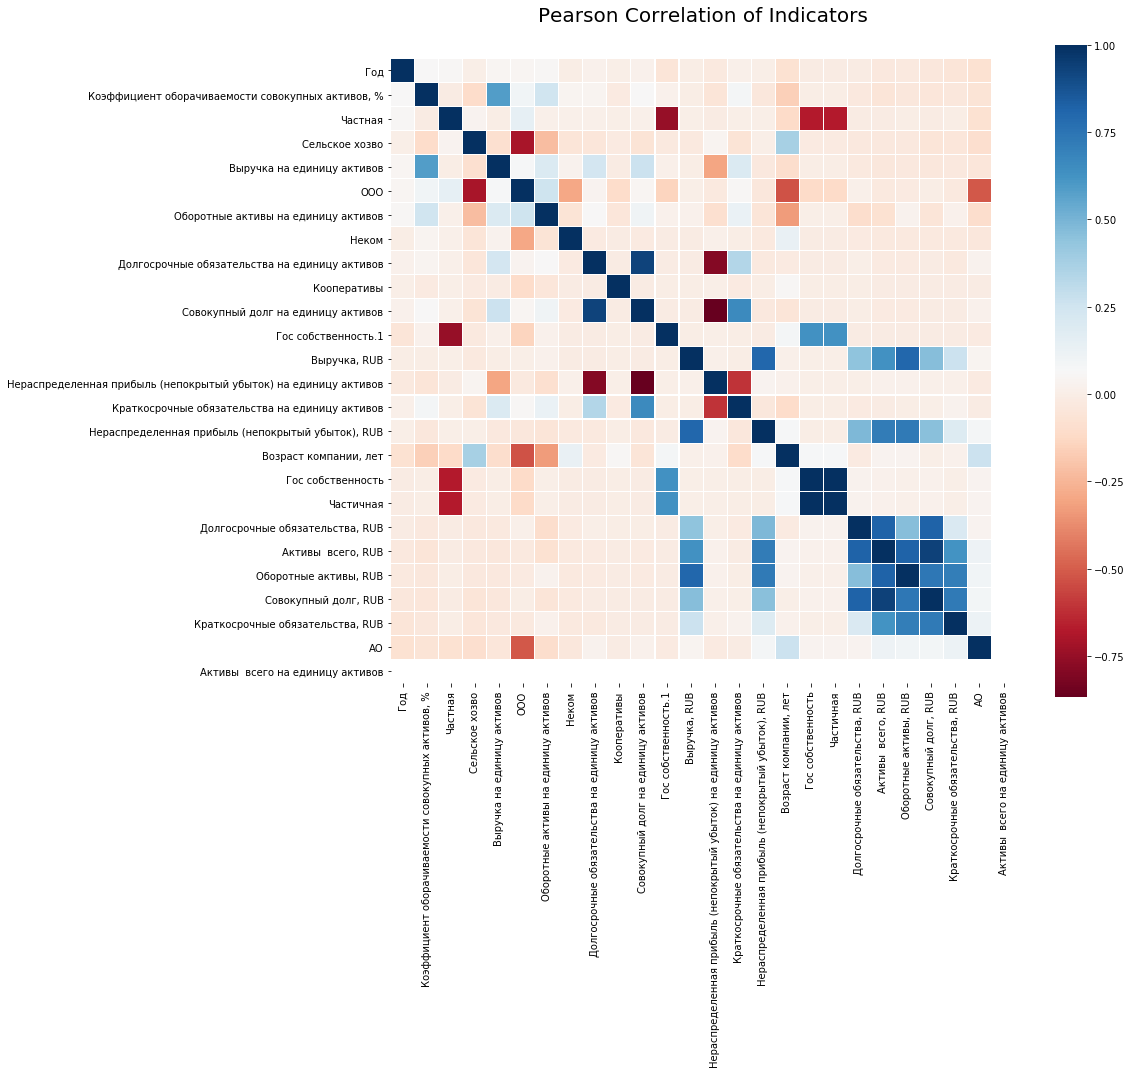

In [16]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Indicators', y=1.05, size=20)
sns.heatmap(data[cols].corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=False)

Теперь посмотрим на совместную корреляцию только тех коэффициентов, у которых модуль коэффициента корреляции с Y (статус) > 0.05

In [17]:
high_corr_cols = np.array(tabl.indicator[abs(tabl['value']) > 0.05])

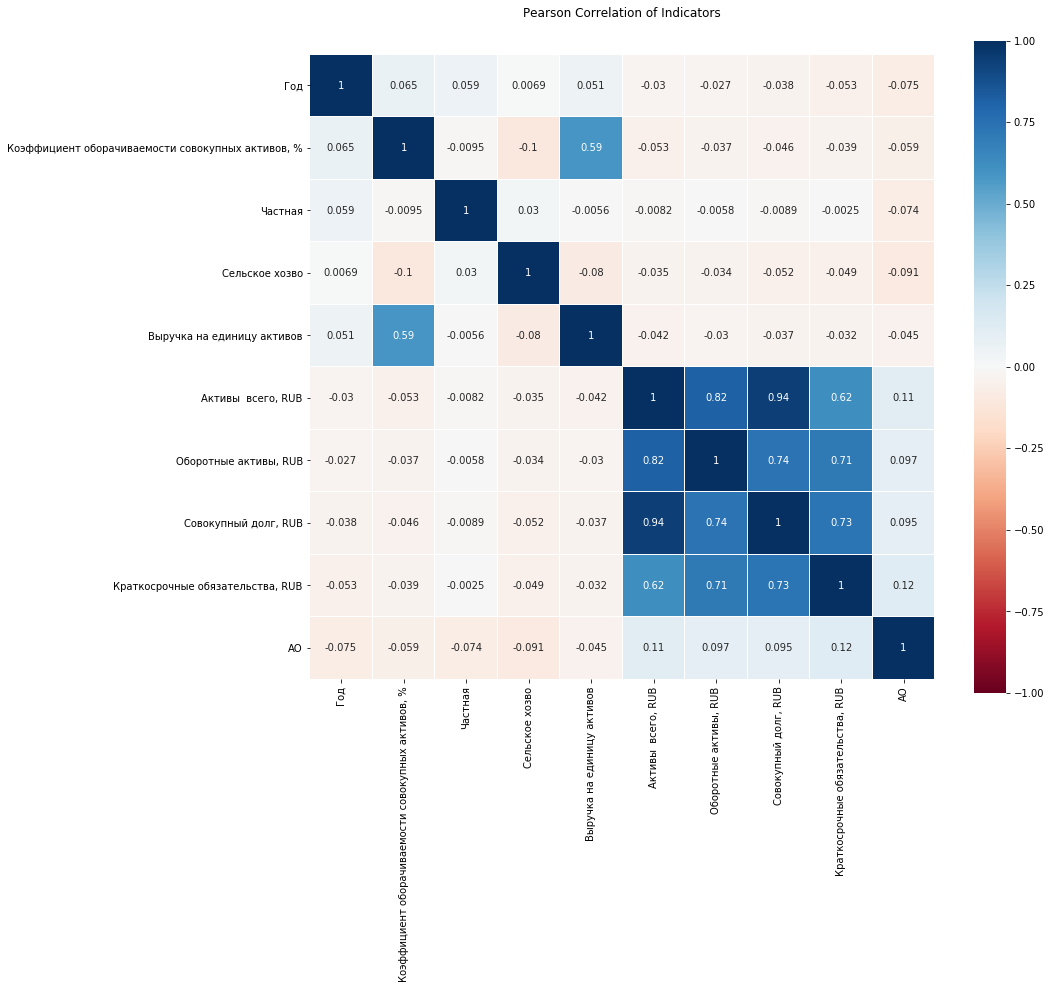

In [18]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Indicators', y=1.05, size=12)
sns.heatmap(data[high_corr_cols].corr(),
            linewidths=0.1, vmax=1.0, vmin=-1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Видим, что год очень сильно коррелирует с данными. посмотрим на статистики коэффициентов в зависимости от года

In [25]:
data_num.groupby('Год').mean()

,"Возраст компании, лет","Оборотные активы, RUB","Активы всего, RUB","Нераспределенная прибыль (непокрытый убыток), RUB","Долгосрочные обязательства, RUB","Краткосрочные обязательства, RUB","Совокупный долг, RUB","Выручка, RUB","Коэффициент оборачиваемости совокупных активов, %",Оборотные активы на единицу активов,Активы всего на единицу активов,Нераспределенная прибыль (непокрытый убыток) на единицу активов,Долгосрочные обязательства на единицу активов,Краткосрочные обязательства на единицу активов,Совокупный долг на единицу активов,Выручка на единицу активов,Гос собственность,Частичная,Частная,АО,Гос собственность.1,Сельское хозво,Неком,Кооперативы,ООО
Год,,,,,,,,,,,,,,,,,,,,,,,,,
12.0,22.000000,2.418375e+08,2.937350e+08,2.026000e+06,1.340500e+06,2.413850e+08,2.427255e+08,4.774500e+06,0.235000,0.615000,1.0,0.010000,0.015000,0.605000,0.620000,0.140000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.500000
13.0,15.750000,1.051834e+09,1.090570e+09,1.168500e+07,7.460150e+07,9.991535e+08,1.073755e+09,1.519876e+09,1.070000,0.670000,1.0,0.085000,0.040000,0.835000,0.870000,1.005000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
14.0,17.000000,2.115047e+08,3.403700e+08,4.451267e+07,4.484133e+07,2.183730e+08,2.632143e+08,2.768683e+08,1.218333,0.668333,1.0,0.150000,0.278333,0.495000,0.773333,1.723333,0.000000,0.000000,1.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.666667
15.0,17.666667,6.293933e+07,9.796167e+07,1.103933e+07,1.418400e+07,4.269100e+07,5.687500e+07,3.005700e+07,0.256667,0.776667,1.0,0.180000,0.173333,0.433333,0.606667,0.256667,0.000000,0.000000,1.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.666667
17.0,13.625000,1.195370e+08,1.303372e+08,7.439000e+06,4.480500e+06,9.729450e+07,1.017750e+08,5.670850e+07,0.707500,0.660000,1.0,0.275000,0.220000,1.037500,1.255000,0.700000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000
19.0,14.907106,1.357977e+08,2.516178e+08,5.883526e+07,7.323740e+07,9.261228e+07,1.658497e+08,1.599272e+08,1.807165,0.645448,1.0,-0.085892,0.533101,0.406084,0.939067,1.793960,0.004441,0.008882,0.991118,0.075500,0.005181,0.115470,0.022946,0.002961,0.777942
20.0,13.450864,1.091492e+08,1.891861e+08,5.646665e+07,5.478401e+07,5.766515e+07,1.124492e+08,1.807506e+08,2.507278,0.689124,1.0,-0.290923,0.613711,0.459911,1.073478,2.554527,0.002382,0.004765,0.994640,0.049434,0.004765,0.108398,0.020250,0.002978,0.814175


Посмотрим соотношение банкротств/небанкротств в зависимости от года. Для наглядности сравним только 20 и 19 годы, по ним больше всего данных.

In [52]:
data_2019_2020 = df.copy()
data_2019_2020 = data_2019_2020.drop(data_2019_2020[data_2019_2020['Год'] == 12.0].index)
data_2019_2020 = data_2019_2020.drop(data_2019_2020[data_2019_2020['Год'] == 13.0].index)
data_2019_2020 = data_2019_2020.drop(data_2019_2020[data_2019_2020['Год'] == 14.0].index)
data_2019_2020 = data_2019_2020.drop(data_2019_2020[data_2019_2020['Год'] == 15.0].index)
data_2019_2020 = data_2019_2020.drop(data_2019_2020[data_2019_2020['Год'] == 17.0].index)

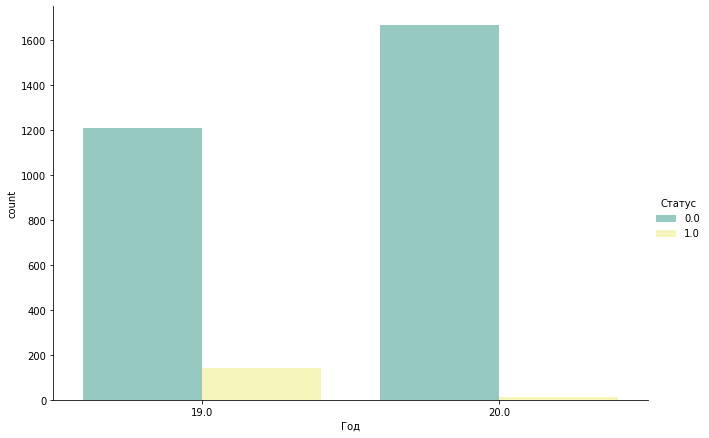

In [53]:
sns.catplot(x = 'Год', hue ="Статус", data=data_2019_2020, kind="count", height = 6, aspect = 1.5, palette = 'Set3')
plt.show()

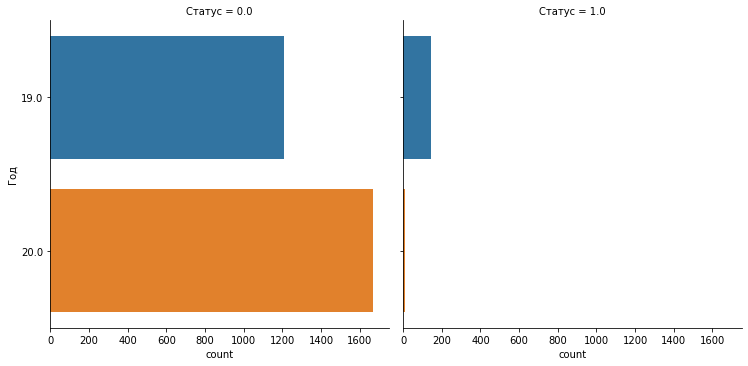

In [56]:
sns.catplot(y="Год", col = 'Статус', data=data_2019_2020, kind="count", col_wrap = 5, margin_titles = False)